오차행렬: [[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC:0.8452


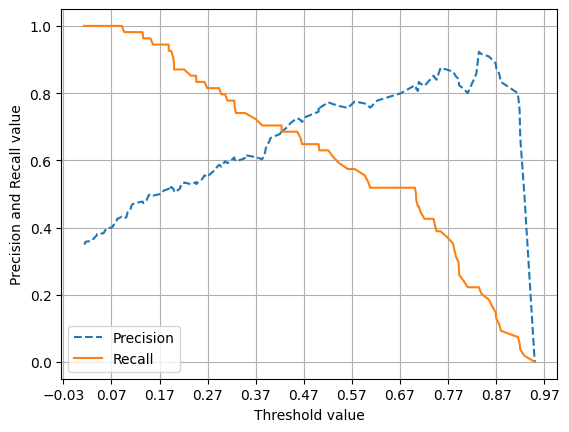

In [ ]:
# Q1_240124. diabetes.csv 데이터세트를 이용해 다음사항을 수행하여 당뇨병 여부를 판단하는 머신러닝 예측 모델을 작성하고 평가하세요.

# - zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']는 0값을 평균값으로 대체
# - 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수 작성
# - 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화


# - 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출
# - 산출된 임계값을 적용한 평가

# ※ 피처 정보  
# 'Pregnancies'(임신 횟수), 'Glucose'(포도당 부하 검사 수치), 'BloodPressure'(혈압),
# 'SkinThickness'(팔 삼두근 뒤쪽의 피하지방 측정값, 'Insulin'(혈청 인슈린),
# 'BMI'(체질량 지수), 'DiabetesPedigreeFunction'(당뇨 내력 가중치 값), 'Age', 'Outcome'

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 데이터 로드
df = pd.read_csv('diabetes.csv')

# 0값을 평균값으로 대체
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
df[zero_features] = df[zero_features].replace(0, df[zero_features].mean())

# 피처 데이터셋 X, 레이블 데이터셋 y 할당
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# train/test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습/예측/평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]


# 평가지표 출력하는 함수
def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬:', confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC:{roc_auc:.4f}')

get_clf_eval(y_test, pred, pred_proba)


# 정밀도와 재현율의 임곗값에 따른 값 변화를 시각화
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    plt.plot(thresholds, precisions[:-1], linestyle='--', label='Precision')
    plt.plot(thresholds, recalls[:-1], label='Recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, pred_proba)





In [ ]:
from sklearn.preprocessing import Binarizer

# 재현율과 다른 평가 지표 간의 균형을 맞추기 위한 임곗값 찾기
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
best_threshold = 0.5
max_recall = recall_score(y_test, pred)

for custom_threshold in thresholds:

    # 임곗값에 따른 예측값 조정
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba.reshape(-1, 1))
    custom_predict = binarizer.transform(pred_proba.reshape(-1, 1))

    # 성능 평가 지표 재계산
    accuracy = accuracy_score(y_test, custom_predict)
    precision = precision_score(y_test, custom_predict)
    recall = recall_score(y_test, custom_predict)

    # 재현율이 이전보다 높고 정확도가 크게 떨어지지 않는 경우, 최적의 임곗값 갱신
    if recall > max_recall and accuracy > 0.7:
        max_recall = recall
        best_threshold = custom_threshold

# 최적의 임곗값으로 예측값 조정
binarizer = Binarizer(threshold=best_threshold).fit(pred_proba.reshape(-1, 1))
custom_predict = binarizer.transform(pred_proba.reshape(-1, 1))

# 조정된 예측값으로 성능 평가 지표 재계산

print(f"최적의 임곗값: {best_threshold}", '\n')
print("최적의 임계값으로 계산된 결과")

get_clf_eval(y_test, custom_predict, pred_proba)


# 기본 임곗값(0.5)을 사용했을 때의 재현율 계산
original_recall = recall_score(y_test, pred)

# 최적의 임곗값을 사용했을 때의 재현율 계산
optimized_recall = recall_score(y_test, custom_predict)

# 향상된 재현율 계산
improvement = optimized_recall - original_recall

# 평가
print(f"향상된 재현율: {improvement:.4f}")



최적의 임곗값: 0.4 

최적의 임계값으로 계산된 결과
오차행렬: [[81 19]
 [16 38]]
정확도: 0.7727, 정밀도: 0.6667, 재현율: 0.7037, F1: 0.6847, AUC:0.8452
향상된 재현율: 0.0556
